In [34]:
import geopandas as gpd
import heapq
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [63]:
def doPlot():
    crimedataLocation = 'D:/AI/Project1/Shape/crime_dt.shp' 
    gridsize = 0.002
    crimedata = gpd.read_file(crimedataLocation)
    
    source = np.array([-73.55,45.49])
#     print(source[1])
    destination = np.array([-73.562,45.502])
    #crimedata.plot()
    bounds=np.array([[-73.562,45.502],[-73.55,45.49],[-73.55,45.502],[-73.562,45.49]])
    long,lat = bounds.T
    
    #gridy = np.arange(min(lat),max(lat),gridsize)

    gridx = crange(min(long), max(long),gridsize)
    #print(gridx)
    latLongY= crange(max(lat),min(lat),-gridsize)
    gridy = crange(min(lat), max(lat),gridsize)
    #print(gridy)
    latLong = np.array(list(itertools.product(gridx, latLongY)))
    #print("Latlong",latLong)
    c = (max(lat) - min(lat))/gridsize
    d = (max(long) - min(long))/gridsize
    c = int(round(c)) + 1
    d = int(round(d)) + 1
    print('cccccc',c)
    latLong =latLong.reshape(c,d,-1)
    print('latLonggg',latLong)
#     latLong = np.flip(latLong,0)
    
    
    #the condition to find the index
    l = np.where(np.logical_and(latLong >=source[0], latLong < (source[0] + gridsize)))
    r = np.where(np.logical_and(latLong >= source[1], latLong < (source[1] + gridsize)))
    listOfCoordinates= list(zip(l[0], l[1]))
    listOfCoordinates1= list(zip(r[0], r[1]))
    value = tuple(set(listOfCoordinates) & set(listOfCoordinates1))
    print('value[0]',value[0])
    
    s = np.where(np.logical_and(latLong >=destination[0], latLong < (destination[0] + gridsize)))
    t = np.where(np.logical_and(latLong >= destination[1], latLong < (destination[1] + gridsize)))
    listOfCoordinates2= list(zip(s[0], t[1]))
    listOfCoordinates3= list(zip(s[0], t[1]))
    value1 = tuple(set(listOfCoordinates2) & set(listOfCoordinates3))
    
#     print(listOfCoordinates)
#     print(listOfCoordinates1)
    #print("tuple value",value[0])
    #print("tuple value1",value1[0])
    #i,j = np.where(np.logical_and(latLong[:,0] == '-73.55', latLong[:,1] == '45.49' ))
    
    #filter = np.asarray(['-73.55'])
    #latLong[np.in1d(latLong[:, 1], filter)]
    #print(i," ",j)
    #print(latLong[:,0])
    #rows1 = np.where(np.logical_and(latLong[:,1] >= 45.49, latLong[:,1] <= ( 45.49 + gridsize)))
    #result = latLong[i,j]
    #result1 = latLong[rows1]
    #print('checkkkkkkk',result)
    #print('checkkkkkkk1',result1)
    #print(r)
    #np.logical_and((latLong[0] >=-73.55, latLong[0] <= (-73.55 + gridsize)))
    #position = index_2d(latLong[:,0], -73.55)  # (4, 3)
    #print(latLong[position[0]][position[1]])
    #ind,ind1 = np.where(np.array(latLong[:,:]) == source[0,0])
    #print(ind)


    #print(latLong)
    #print(latLong[20,0])
    #print(latLong[20,20])
    #print(latLong[0,20])
    
    
    H, xedges, yedges = np.histogram2d(crimedata['geometry'].x, crimedata['geometry'].y,bins=[gridx, gridy])
    #print(crimedata['geometry'].T)
    #print(H.shape)
    plt.figure()
    #plt.plot(x,y,'ro')
    #plt.grid(True)
    #plt.figure()
    myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
#     plt.imshow(H.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto')
    #plt.plot(x,y,'ro')
    #plt.colorbar()
    #plt.scatter(x,y,100,'r')
#     plt.show()
    return H,xedges,yedges,gridsize,tuple(value[0]),tuple(value1[0]),latLong


In [44]:
def cust_range(*args, rtol=1e-05, atol=1e-08, include=[True, False]):
    if len(args) == 1:
        start = 0
        stop = args[0]
        step = 0.002
    elif len(args) == 2:
        start, stop = args
        step = 0.002
    else:
        assert len(args) == 3
        start, stop, step = tuple(args)

    # determine number of segments
    n = (stop-start)/step + 1

    # do rounding for n
    if np.isclose(n, np.round(n), rtol=rtol, atol=atol):
        n = np.round(n)

    # correct for start/end is exluded
    if not include[0]:
        n -= 1
        start += step
    if not include[1]:
        n -= 1
        stop -= step

    return np.linspace(start, stop, int(n))
def crange(*args, **kwargs):
    return cust_range(*args, **kwargs, include=[True, True])


In [45]:
def thresholdCalc(H):
    threshold = int(70)
    #reversesorted_array = -np.sort(-H)
    sorted_array = H.reshape(1,-1)
    sorted_array.sort()
    
    #reverse_sort = np.fliplr(H)
    #reverse_sort = sorted_array[::-1]
    numberOfElements = np.size(H,1)
    #calchighrisk = np.divide(threshold,100)
    #print(sorted_array[0])
    highriskNum = sorted_array[0][int(threshold/100 * sorted_array.shape[1])]
    #print(highriskNum)
    mean = np.mean(H)
    print("Mean is ",mean)
    sd = np.std(H)
    print("Standard Deviation is ",sd)
    return int(highriskNum)
    
    


In [46]:
def cust_range(*args, rtol=1e-05, atol=1e-08, include=[True, False]):
    if len(args) == 1:
        start = 0
        stop = args[0]
        step = 0.002
    elif len(args) == 2:
        start, stop = args
        step = 0.002
    else:
        assert len(args) == 3
        start, stop, step = tuple(args)

    # determine number of segments
    n = (stop-start)/step + 1

    # do rounding for n
    if np.isclose(n, np.round(n), rtol=rtol, atol=atol):
        n = np.round(n)

    # correct for start/end is exluded
    if not include[0]:
        n -= 1
        start += step
    if not include[1]:
        n -= 1
        stop -= step

    return np.linspace(start, stop, int(n))
def crange(*args, **kwargs):
    return cust_range(*args, **kwargs, include=[True, True])


In [47]:
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

In [70]:
#array =[[0., 0., 0., 0., 0. 1.]
# [1. 0. 0. 0. 1. 1.]
#  [0. 1. 0. 0. 1. 1.]
#  [0. 0. 0. 0. 0. 1.]
#  [0. 0. 0. 1. 1. 1.]
#  [0. 0. 0. 0. 0. 0.]]
#start =(6,6)
#goal =(0,0)
def astar(array, start, goal):
    print('start',start)
    
#     print((start))
    print(goal)
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    #print({start:0})
    gscore = {start:0}
    print("gscore",gscore)
    fscore = {start:heuristic(start, goal)}
    print("fscore",fscore)
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    print('oheap',oheap)
    #print(heapq.heappush(oheap, (fscore[start], start)))
    #print(heapin)
    
    while oheap:

        current = heapq.heappop(oheap)[1]
        print('current',current)
        if current == goal:
            data = []
            #print(came_from)
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            print(tentative_g_score)
            if 0 <= neighbor[0] < array.shape[0] and 0 <= neighbor[1] < array.shape[1]:   
                print("neighbour",neighbor,"value",array[neighbor[0]][neighbor[1]])
                if array[neighbor[0]][neighbor[1]] == 1:
                    continue
            else:
                # array bound x walls
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
                
    return False

cccccc 7
latLonggg [[[-73.562  45.502]
  [-73.562  45.5  ]
  [-73.562  45.498]
  [-73.562  45.496]
  [-73.562  45.494]
  [-73.562  45.492]
  [-73.562  45.49 ]]

 [[-73.56   45.502]
  [-73.56   45.5  ]
  [-73.56   45.498]
  [-73.56   45.496]
  [-73.56   45.494]
  [-73.56   45.492]
  [-73.56   45.49 ]]

 [[-73.558  45.502]
  [-73.558  45.5  ]
  [-73.558  45.498]
  [-73.558  45.496]
  [-73.558  45.494]
  [-73.558  45.492]
  [-73.558  45.49 ]]

 [[-73.556  45.502]
  [-73.556  45.5  ]
  [-73.556  45.498]
  [-73.556  45.496]
  [-73.556  45.494]
  [-73.556  45.492]
  [-73.556  45.49 ]]

 [[-73.554  45.502]
  [-73.554  45.5  ]
  [-73.554  45.498]
  [-73.554  45.496]
  [-73.554  45.494]
  [-73.554  45.492]
  [-73.554  45.49 ]]

 [[-73.552  45.502]
  [-73.552  45.5  ]
  [-73.552  45.498]
  [-73.552  45.496]
  [-73.552  45.494]
  [-73.552  45.492]
  [-73.552  45.49 ]]

 [[-73.55   45.502]
  [-73.55   45.5  ]
  [-73.55   45.498]
  [-73.55   45.496]
  [-73.55   45.494]
  [-73.55   45.492]
  [-73.55

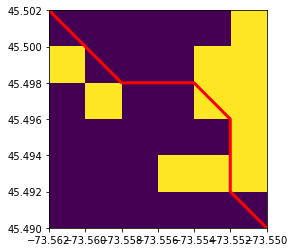

In [71]:
if __name__=="__main__":
    H,xedges,yedges,grid_size,source,destination,latLong = doPlot()
    
    threshold_limit = thresholdCalc(H)
    print(threshold_limit)
    print(H)
    reversesorted_array = H.copy();
    
    reversesorted_array[reversesorted_array < threshold_limit] = 0
    reversesorted_array[reversesorted_array >= threshold_limit] = 1
    print(reversesorted_array)
    plt.imshow(reversesorted_array,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    #valid = findChild(source,destination,grid_size)
    start = source
    goal = destination

    route = astar(reversesorted_array, source, destination)
    
    print(latLong)
    if(isinstance(route, bool) and route == False):
        print("Path Not found")
    if(isinstance(route, list)):
        
        route = route + [start]
        print("route",route)
        routeArray = np.array(route)
        route_coordinates = []
        for i,j in routeArray:
            n_x,n_y = latLong[i,j]
            #print()
            n_x = round(n_x,3)
            n_y = round(n_y,3)
            route_coordinates.append((n_x,n_y))
        
        route_coordinates = np.array(route_coordinates)
        print(route_coordinates)
        print(reversesorted_array)
#     print(route_coordinates
        plt.plot(route_coordinates[:,0], route_coordinates[:,1], c='red', linewidth=3)
        plt.show()